## Predictive Health Care

***

## Project Description

PwC is working closely with a network of doctors from Germany. The doctors are interested in finding the possible adverse effects of drugs used to treat neurological pain.

Besides treatment with usual drugs such as gapapentin or lyrica, doctors have found tramal to be a good remedy against neurological pain. If all of these have a similar effect, it would be interesting for the doctors to compare the adverse effects of tramal to gabapentin or lyrica. Depending on the patient, they could then prescribe the medication with fewer adverse effects. 

The US has a central database, hosted by the FDA. The FDA Adverse Event Reporting System (FAERS) is a database that contains information on adverse event and medication error reports submitted to FDA. The database is designed to support the FDA’s post-marketing safety surveillance programme for drug and therapeutic biologic products. 

## Data Description

Code for a patient outcome (See table below)

**CODE MEANING_TEXT**

DE Death 

LT Life-Threatening 

HO Hospitalization - Initial or Prolonged 

DS Disability 

CA Congenital Anomaly 

RI Required Intervention to Prevent Permanent Impairment/Damage 

OT Other Serious (Important Medical Event) 

NOTE: The outcome from the latest version of a case is provided. If there is more than one outcome, the codes will be line listed.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### 2019 Quarter 1

In [2]:
df_19Q1_drug = pd.read_table("DRUG19Q1.txt",sep='$')

In [3]:
df_19Q1_drug

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,1000661812,10006618,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,20702.00,nan,NaN,FILM-COATED TABLET,NaN
1,1000661812,10006618,2,SS,BENTYL,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
2,1000661812,10006618,3,SS,DICYCLOMINE,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
3,1000808590,10008085,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",nan,NaN,NaN,NaN,NaN,NaN,21008.00,20.00,MG,NaN,QOW
4,1000808590,10008085,2,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG, QMO",nan,NaN,NaN,NaN,NaN,NaN,21008.00,30.00,MG,NaN,/month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648982,99978793,9997879,3,C,DOLIPRANE,ACETAMINOPHEN,1,NaN,UNK,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
1648983,99978793,9997879,4,C,INDOCOLLYRE,INDOMETHACIN,1,NaN,UNK,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
1648984,99978793,9997879,5,C,LEDERFOLIN,LEUCOVORIN CALCIUM,1,NaN,UNK,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
1648985,99998153,9999815,1,PS,SUTENT,SUNITINIB MALATE,1,Oral,"37.5 MG, CYCLIC (DAILY, 4 WEEKS ON, 2 WEEKS OFF)",nan,NaN,Y,NaN,NaN,NaN,21938.00,37.50,MG,"CAPSULE, HARD",NaN


In [4]:
df_19Q1_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648987 entries, 0 to 1648986
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   primaryid      1648987 non-null  int64  
 1   caseid         1648987 non-null  int64  
 2   drug_seq       1648987 non-null  int64  
 3   role_cod       1648987 non-null  object 
 4   drugname       1648977 non-null  object 
 5   prod_ai        1617259 non-null  object 
 6   val_vbm        1648987 non-null  int64  
 7   route          1185339 non-null  object 
 8   dose_vbm       985266 non-null   object 
 9   cum_dose_chr   47009 non-null    float64
 10  cum_dose_unit  47023 non-null    object 
 11  dechal         856330 non-null   object 
 12  rechal         258523 non-null   object 
 13  lot_num        289346 non-null   object 
 14  exp_dt         3496 non-null     object 
 15  nda_num        531373 non-null   float64
 16  dose_amt       656764 non-null   float64
 17  dose_uni

In [5]:
df_19Q1_drug.describe()

,primaryid,caseid,drug_seq,val_vbm,cum_dose_chr,nda_num,dose_amt
count,1648987.00,1648987.00,1648987.00,1648987.00,47009.00,531373.00,656764.00
mean,190114742.75,15453701.21,6.92,1.02,42283.39,95447814.91,1031.45
std,198681637.69,1119314.35,11.64,0.14,1859674.13,13611129397.52,170499.67
min,37624583.00,3762458.00,1.00,1.00,0.00,0.00,0.00
25%,156449482.00,15530068.00,1.00,1.00,75.00,21829.00,5.00
50%,158806961.00,15867207.00,4.00,1.00,600.00,90071.00,30.00
75%,160128414.00,15997378.50,8.00,1.00,4980.00,202439.00,150.00
max,1593052612.00,16156981.00,397.00,2.00,390000000.00,3400955762713.00,78000000.00


In [6]:
df_19Q1_drug.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq'], dtype='object')

In [7]:
df_19Q1_drug.drop(['caseid', 'drug_seq', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq'],axis=1,inplace=True)

In [8]:
df_19Q1_drug

,primaryid,role_cod,drugname
0,1000661812,PS,LIPITOR
1,1000661812,SS,BENTYL
2,1000661812,SS,DICYCLOMINE
3,1000808590,PS,SANDOSTATIN LAR DEPOT
4,1000808590,SS,SANDOSTATIN LAR DEPOT
...,...,...,...
1648982,99978793,C,DOLIPRANE
1648983,99978793,C,INDOCOLLYRE
1648984,99978793,C,LEDERFOLIN
1648985,99998153,PS,SUTENT


### Load the outcome file

In [9]:
df_19Q1_OUT = pd.read_table("OUTC19Q1.txt", sep='$')

In [10]:
df_19Q1_OUT

,primaryid,caseid,outc_cod
0,1000808590,10008085,HO
1,1000808590,10008085,OT
2,100107484,10010748,OT
3,100107484,10010748,HO
4,100171328,10017132,OT
...,...,...,...
310657,99885794,9988579,DS
310658,99885794,9988579,OT
310659,99924278,9992427,HO
310660,99978793,9997879,HO


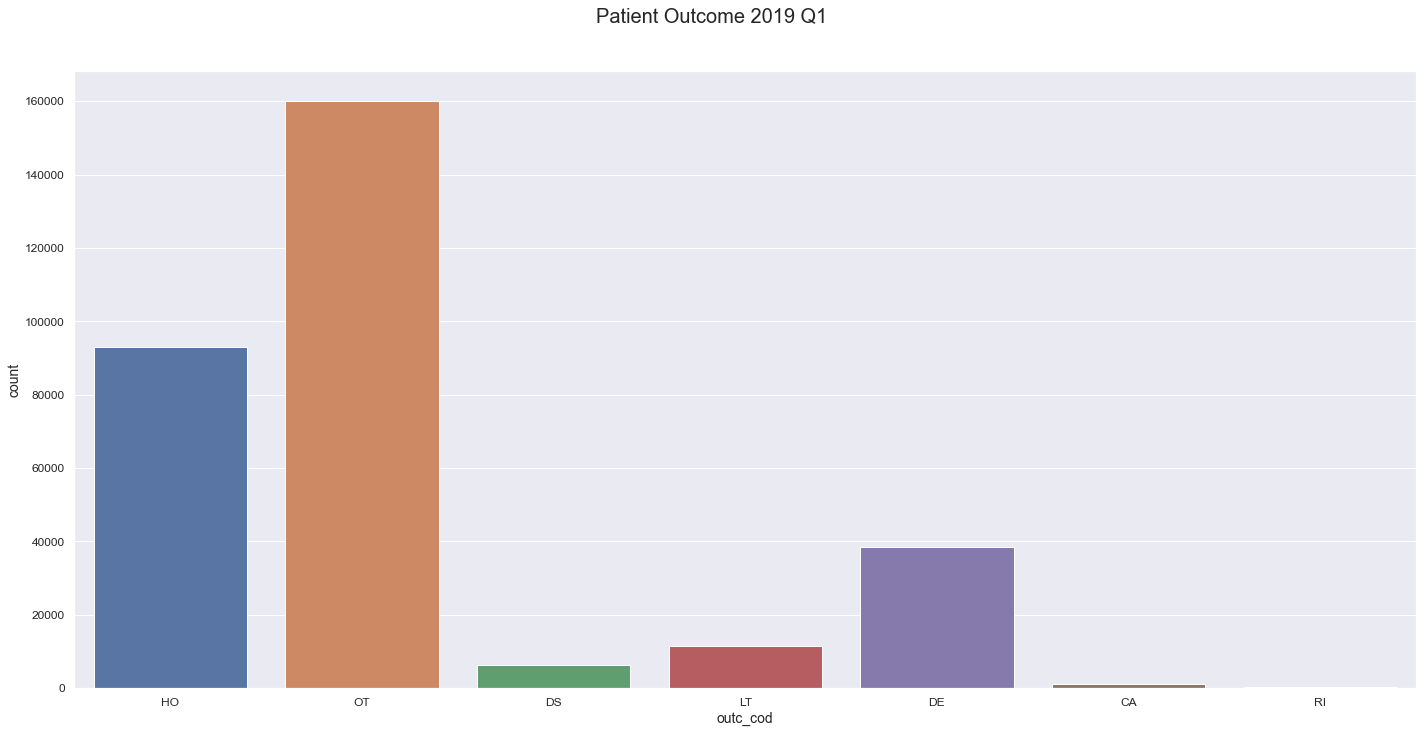

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_19Q1_OUT.outc_cod)
plt.suptitle('Patient Outcome 2019 Q1', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [12]:
dfQ1 = pd.merge(left=df_19Q1_drug, right=df_19Q1_OUT, how='inner', on='primaryid')

In [13]:
dfQ1

,primaryid,role_cod,drugname,caseid,outc_cod
0,1000808590,PS,SANDOSTATIN LAR DEPOT,10008085,HO
1,1000808590,PS,SANDOSTATIN LAR DEPOT,10008085,OT
2,1000808590,SS,SANDOSTATIN LAR DEPOT,10008085,HO
3,1000808590,SS,SANDOSTATIN LAR DEPOT,10008085,OT
4,1000808590,SS,SANDOSTATIN LAR DEPOT,10008085,HO
...,...,...,...,...,...
1684340,99978793,C,DOLIPRANE,9997879,HO
1684341,99978793,C,INDOCOLLYRE,9997879,HO
1684342,99978793,C,LEDERFOLIN,9997879,HO
1684343,99998153,PS,SUTENT,9999815,HO


In [14]:
dfQ1['drugname'].value_counts()

HUMIRA                                                                    19293
NEXIUM                                                                    17213
PREDNISONE.                                                               16567
XOLAIR                                                                    15772
METHOTREXATE.                                                             14815
                                                                          ...  
ALIVIATOS                                                                     1
THERAGRAN [ASCORBIC ACID;BIOTIN;CALCIUM PANTOTHENATE;CYANOCOBALAMIN;ER        1
CIMICIFUGA                                                                    1
morphine sul                                                                  1
Multi vitamin infusion (Ascorbic acid, Pyridoxine hydrochloride, Tocop        1
Name: drugname, Length: 50808, dtype: int64

In [15]:
(dfQ1['drugname'] == "LYRICA").value_counts()

False    1677652
True        6693
Name: drugname, dtype: int64

In [16]:
(dfQ1['drugname'] == "TRAMAL").value_counts()

False    1684095
True         250
Name: drugname, dtype: int64

In [17]:
(dfQ1['drugname'] == "GABAPENTIN.").value_counts()

False    1675573
True        8772
Name: drugname, dtype: int64

### Select the three medications

In [18]:
df2Q1 = dfQ1[(dfQ1['drugname'] == "LYRICA") | (dfQ1['drugname'] == "TRAMAL") | (dfQ1['drugname'] == "GABAPENTIN.")]

In [19]:
df2Q1

,primaryid,role_cod,drugname,caseid,outc_cod
194,100442633,SS,GABAPENTIN.,10044263,OT
195,100442633,SS,GABAPENTIN.,10044263,DS
896,100716802,SS,LYRICA,10071680,OT
938,100904069,PS,LYRICA,10090406,HO
939,100904069,PS,LYRICA,10090406,OT
...,...,...,...,...,...
1683997,992278323,C,GABAPENTIN.,9922783,OT
1684012,99252085,SS,LYRICA,9925208,HO
1684120,99314732,SS,LYRICA,9931473,HO
1684322,99885794,C,TRAMAL,9988579,DS


In [20]:
df2Q1.groupby(by=['outc_cod','drugname'])['primaryid'].count()

outc_cod  drugname   
CA        GABAPENTIN.      15
          LYRICA            2
DE        GABAPENTIN.    1358
          LYRICA          352
          TRAMAL           37
DS        GABAPENTIN.     213
          LYRICA          162
          TRAMAL            4
HO        GABAPENTIN.    2814
          LYRICA         2200
          TRAMAL           86
LT        GABAPENTIN.     223
          LYRICA          201
          TRAMAL           22
OT        GABAPENTIN.    4147
          LYRICA         3776
          TRAMAL          101
RI        GABAPENTIN.       2
Name: primaryid, dtype: int64

In [21]:
df2Q1.to_csv("dfQ1.csv", index=False)

In [22]:
tabledf2Q1 = pd.pivot_table(data=df2Q1, index=['outc_cod'], columns=['drugname'], aggfunc='count')['caseid']

In [23]:
tabledf2Q1

drugname,GABAPENTIN.,LYRICA,TRAMAL
outc_cod,,,
CA,15.00,2.00,nan
DE,1358.00,352.00,37.00
DS,213.00,162.00,4.00
HO,2814.00,2200.00,86.00
LT,223.00,201.00,22.00
OT,4147.00,3776.00,101.00
RI,2.00,nan,nan


## Data Visualization

<Figure size 1440x1440 with 0 Axes>

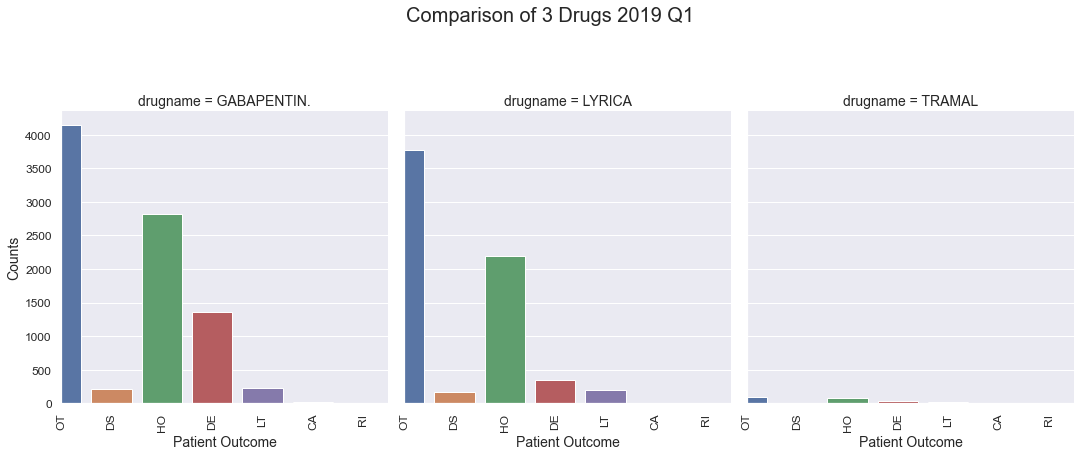

In [24]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='outc_cod', col = 'drugname',
            kind='count', data=df2Q1,
            height = 5, aspect = 1)

g.set_xlabels("Patient Outcome")
g.set_ylabels("Counts")

g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle("Comparison of 3 Drugs 2019 Q1", x=0.5, y=1.2, ha='center', fontsize=20)

plt.show()

### 2019 Quarter 2

In [25]:
df_19Q2_drug = pd.read_table("DRUG19Q2.txt",sep='$')

In [26]:
df_19Q2_drug

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,1000661813,10006618,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,20702.00,nan,NaN,FILM-COATED TABLET,NaN
1,1000661813,10006618,2,SS,BENTYL,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
2,1000661813,10006618,3,SS,DICYCLOMINE,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,nan,NaN,U,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN
3,1000808410,10008084,1,PS,"INFLIXIMAB, RECOMBINANT",INFLIXIMAB,1,Intravenous (not otherwise specified),NaN,nan,NaN,NaN,U,NaN,NaN,103772.00,3.00,MG/KG,LYOPHILIZED POWDER,/wk
4,1000808410,10008084,2,C,METHOTREXATE.,METHOTREXATE,1,Unknown,NaN,nan,NaN,D,NaN,NaN,NaN,nan,nan,NaN,UNSPECIFIED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863005,999981612,9999816,15,C,CALCIUM +VIT D,CALCIUM\VITAMIN D,1,Oral,"1 DF, 3X/DAY",nan,NaN,NaN,NaN,NaN,NaN,nan,1.00,DF,TABLET,TID
1863006,999981612,9999816,16,C,RESTASIS,CYCLOSPORINE,1,NaN,"1 GTT, 2X/DAY (1 GTT IN EACH AFFECTED EYE EVER...",nan,NaN,NaN,NaN,NaN,NaN,nan,1.00,GTT,NaN,BID
1863007,999981612,9999816,17,C,TRAZODONE,TRAZODONE HYDROCHLORIDE,1,Oral,"100 MG, 3X/DAY",nan,NaN,NaN,NaN,NaN,NaN,nan,100.00,MG,TABLET,TID
1863008,999981612,9999816,18,C,TIZANIDINE.,TIZANIDINE,1,Oral,"8 MG, DAILY",nan,NaN,NaN,NaN,NaN,NaN,nan,8.00,MG,TABLET,NaN


In [27]:
df_19Q2_drug.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863010 entries, 0 to 1863009
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   primaryid      1863010 non-null  int64  
 1   caseid         1863010 non-null  int64  
 2   drug_seq       1863010 non-null  int64  
 3   role_cod       1863010 non-null  object 
 4   drugname       1862993 non-null  object 
 5   prod_ai        1827186 non-null  object 
 6   val_vbm        1863010 non-null  int64  
 7   route          1321842 non-null  object 
 8   dose_vbm       1068362 non-null  object 
 9   cum_dose_chr   47352 non-null    float64
 10  cum_dose_unit  47247 non-null    object 
 11  dechal         956418 non-null   object 
 12  rechal         285765 non-null   object 
 13  lot_num        319696 non-null   object 
 14  exp_dt         5092 non-null     object 
 15  nda_num        578843 non-null   float64
 16  dose_amt       783999 non-null   float64
 17  dose_uni

In [28]:
df_19Q2_drug.describe()

,primaryid,caseid,drug_seq,val_vbm,cum_dose_chr,nda_num,dose_amt
count,1863010.00,1863010.00,1863010.00,1863010.00,47352.00,578843.00,783999.00
mean,197427186.64,15771903.29,7.21,1.02,46024.45,97522295.22,851.59
std,210867983.25,1135669.67,10.49,0.14,1699622.09,14333987978.39,157949.90
min,39490342.00,3949034.00,1.00,1.00,0.00,0.00,0.00
25%,159405832.00,15806260.00,2.00,1.00,78.00,21344.00,3.00
50%,162233237.50,16204212.50,4.00,1.00,600.00,78787.00,20.00
75%,163698028.50,16349342.00,9.00,1.00,5850.00,202192.00,108.00
max,1636576010.00,16517055.00,326.00,2.00,199000000.00,2280000731000.00,72000000.00


In [29]:
df_19Q2_drug.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq'], dtype='object')

In [30]:
df_19Q2_drug.drop(['caseid', 'drug_seq', 'prod_ai', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form', 'dose_freq'],axis=1,inplace=True)

In [31]:
df_19Q2_drug

,primaryid,role_cod,drugname
0,1000661813,PS,LIPITOR
1,1000661813,SS,BENTYL
2,1000661813,SS,DICYCLOMINE
3,1000808410,PS,"INFLIXIMAB, RECOMBINANT"
4,1000808410,C,METHOTREXATE.
...,...,...,...
1863005,999981612,C,CALCIUM +VIT D
1863006,999981612,C,RESTASIS
1863007,999981612,C,TRAZODONE
1863008,999981612,C,TIZANIDINE.


### Load the outcome file

In [32]:
df_19Q2_OUT = pd.read_table("OUTC19Q2.txt", sep='$')

In [33]:
df_19Q2_OUT

,primaryid,caseid,outc_cod
0,1000808410,10008084,OT
1,100088884,10008888,OT
2,100097843,10009784,OT
3,1001163924,10011639,OT
4,1001443222,10014432,HO
...,...,...,...
324733,99924843,9992484,OT
324734,99943572,9994357,OT
324735,99943572,9994357,LT
324736,999981612,9999816,DS


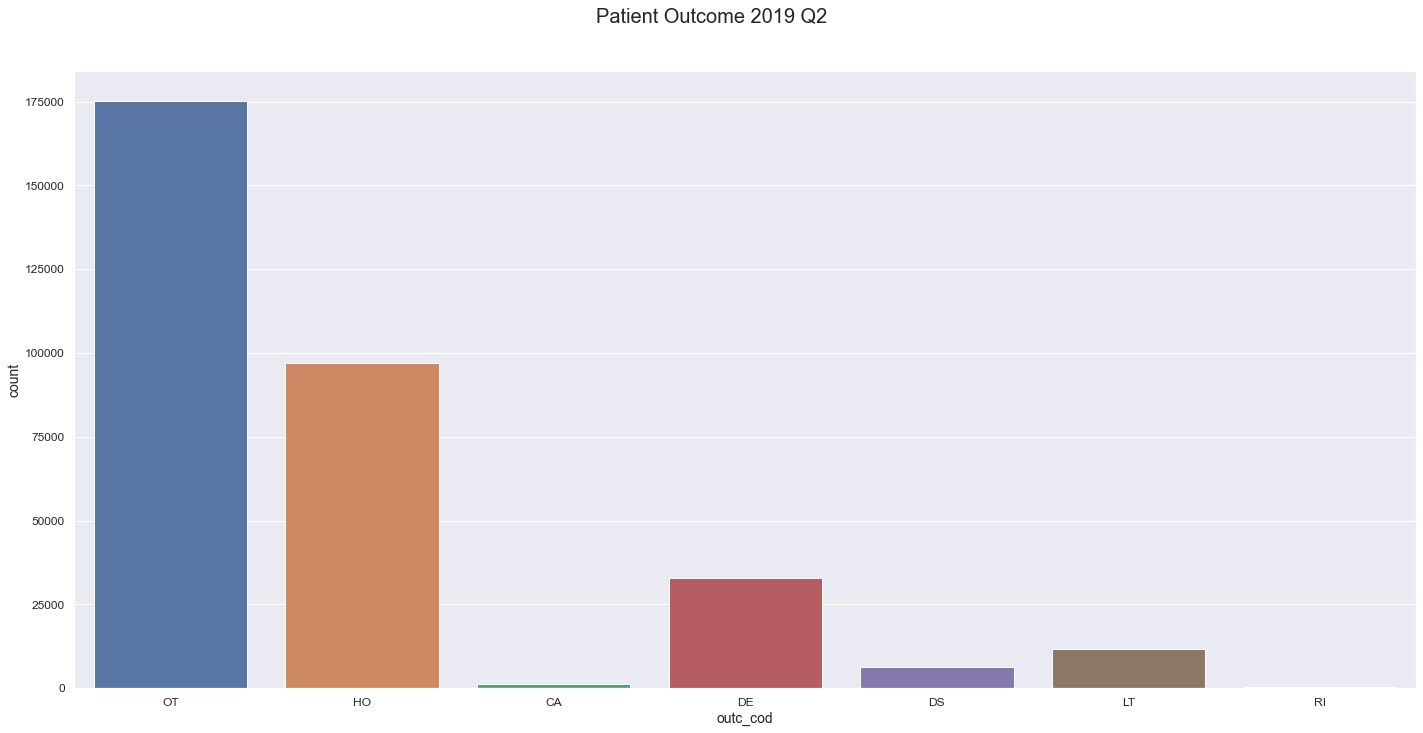

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_19Q2_OUT.outc_cod)
plt.suptitle('Patient Outcome 2019 Q2', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [35]:
dfQ2 = pd.merge(left=df_19Q2_drug, right=df_19Q2_OUT, how='inner', on='primaryid')

In [36]:
dfQ2

,primaryid,role_cod,drugname,caseid,outc_cod
0,1000808410,PS,"INFLIXIMAB, RECOMBINANT",10008084,OT
1,1000808410,C,METHOTREXATE.,10008084,OT
2,100088884,PS,JAKAFI,10008888,OT
3,100088884,SS,JAKAFI,10008888,OT
4,100088884,SS,JAKAFI,10008888,OT
...,...,...,...,...,...
1858469,999981612,C,TRAZODONE,9999816,OT
1858470,999981612,C,TIZANIDINE.,9999816,DS
1858471,999981612,C,TIZANIDINE.,9999816,OT
1858472,999981612,C,BOTOX,9999816,DS


In [37]:
dfQ2['drugname'].value_counts()

NEXIUM                                                            31346
PRILOSEC                                                          23346
PREVACID                                                          23202
PREDNISONE.                                                       19329
HUMIRA                                                            18779
                                                                  ...  
VISINE ORIGINAL REDNESS RELIEF                                        1
fluocin acet                                                          1
SALINE [BORIC ACID;EDETATE DISODIUM;SODIUM BORATE;SORBIC ACID]        1
Doxycyc mono                                                          1
levocetrizine                                                         1
Name: drugname, Length: 54011, dtype: int64

In [38]:
(dfQ2['drugname'] == "LYRICA").value_counts()

False    1849217
True        9257
Name: drugname, dtype: int64

In [39]:
(dfQ2['drugname'] == "TRAMAL").value_counts()

False    1858239
True         235
Name: drugname, dtype: int64

In [40]:
(dfQ2['drugname'] == "GABAPENTIN.").value_counts()

False    1849234
True        9240
Name: drugname, dtype: int64

### Select the three medications

In [41]:
df2Q2 = dfQ2[(dfQ2['drugname'] == "LYRICA") | (dfQ2['drugname'] == "TRAMAL") | (dfQ2['drugname'] == "GABAPENTIN.")]

In [42]:
df2Q2

,primaryid,role_cod,drugname,caseid,outc_cod
126,1001443222,SS,LYRICA,10014432,HO
127,1001443222,SS,LYRICA,10014432,OT
355,100242679,PS,LYRICA,10024267,DS
356,100242679,PS,LYRICA,10024267,HO
357,100242679,PS,LYRICA,10024267,OT
...,...,...,...,...,...
1858439,999981612,SS,LYRICA,9999816,OT
1858440,999981612,SS,LYRICA,9999816,DS
1858441,999981612,SS,LYRICA,9999816,OT
1858442,999981612,SS,LYRICA,9999816,DS


In [43]:
df2Q2.groupby(by=['outc_cod','drugname'])['primaryid'].count()

outc_cod  drugname   
CA        GABAPENTIN.      18
          LYRICA            4
          TRAMAL            1
DE        GABAPENTIN.     662
          LYRICA          356
          TRAMAL           36
DS        GABAPENTIN.     236
          LYRICA          268
          TRAMAL            1
HO        GABAPENTIN.    2908
          LYRICA         3093
          TRAMAL           80
LT        GABAPENTIN.     271
          LYRICA          222
          TRAMAL           25
OT        GABAPENTIN.    5137
          LYRICA         5314
          TRAMAL           92
RI        GABAPENTIN.       8
Name: primaryid, dtype: int64

In [44]:
df2Q2.to_csv("dfQ2.csv", index=False)

In [45]:
tabledf2Q2 = pd.pivot_table(data=df2Q2, index=['outc_cod'], columns=['drugname'], aggfunc='count')['caseid']

In [46]:
tabledf2Q2

drugname,GABAPENTIN.,LYRICA,TRAMAL
outc_cod,,,
CA,18.00,4.00,1.00
DE,662.00,356.00,36.00
DS,236.00,268.00,1.00
HO,2908.00,3093.00,80.00
LT,271.00,222.00,25.00
OT,5137.00,5314.00,92.00
RI,8.00,nan,nan


## Data Visualization

<Figure size 1440x1440 with 0 Axes>

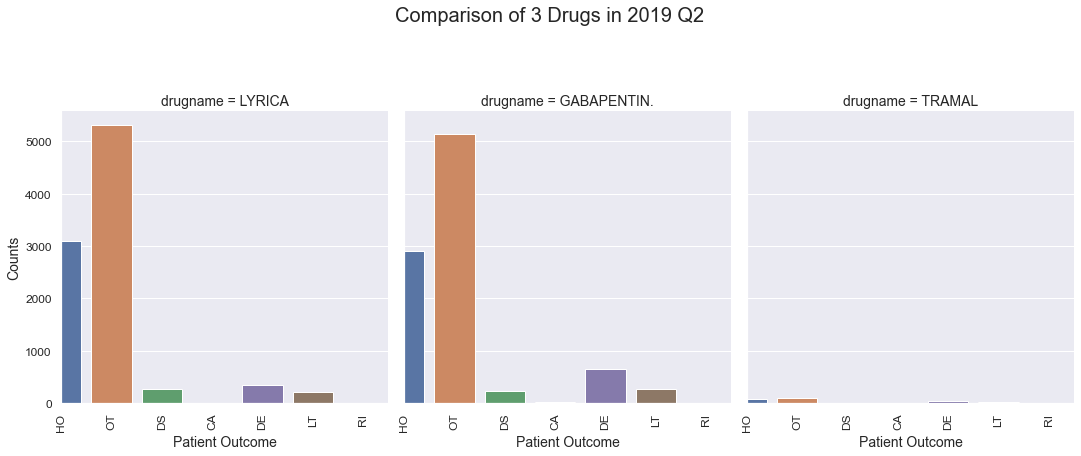

In [47]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='outc_cod', col = 'drugname',
            kind='count', data=df2Q2,
            height = 5, aspect = 1)

g.set_xlabels("Patient Outcome")
g.set_ylabels("Counts")

g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle("Comparison of 3 Drugs in 2019 Q2", x=0.5, y=1.2, ha='center', fontsize=20)

plt.show()

## Conclusion

Tramal Drug has least risk compared to Lyrica and Gabapentin. Mostly low cases of Hospitalization or Other Serious events experienced by patients.

#### Python code done by Dennis Lam